In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

df = pd.read_csv('지역화폐 가맹점_20240331.csv',  encoding='cp949')

c:\Users\camar\anaconda3\envs\tf-gpu\lib\site-packages\IPython\core\interactiveshell.py:3552: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [111]:
# 한글 글꼴 설정 (macOS에서 사용 가능한 한글 글꼴)
# font_path = "/System/Library/Fonts/Supplemental/AppleGothic.ttf"  # macOS에서 'AppleGothic' 글꼴을 사용합니다
# font = font_manager.FontProperties(fname=font_path).get_name()
# rc('font', family=font)

In [2]:
# 데이터 복사본 만들기
df1 = df.copy()

In [3]:
# 데이터의 행, 열 개수 출력
print('데이터1의 행, 열 개수 : ')
print(df1.shape)

데이터1의 행, 열 개수 : 
(418750, 15)


In [4]:
# 데이터의 구조와 타입(변수 속성)
print('데이터1의 구조와 타입 : ')
print(df1.info())

데이터1의 구조와 타입 : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418750 entries, 0 to 418749
Data columns (total 15 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   시군명       418750 non-null  object 
 1   상호명       418750 non-null  object 
 2   업종명(종목명)  418750 non-null  object 
 3   소재지도로명주소  401510 non-null  object 
 4   소재지지번주소   418750 non-null  object 
 5   우편번호      414011 non-null  float64
 6   위도        410910 non-null  float64
 7   경도        410910 non-null  float64
 8   사업자등록번호   418750 non-null  object 
 9   업종코드      418750 non-null  int64  
 10  가맹점번호     402898 non-null  object 
 11  휴폐업상태     105882 non-null  object 
 12  휴폐업상태코드   105882 non-null  float64
 13  폐업일자      15191 non-null   object 
 14  데이터기준일자   418750 non-null  int64  
dtypes: float64(4), int64(2), object(9)
memory usage: 47.9+ MB
None


In [5]:
# 필요한 변수명 : 시군명, 상호명, 업종명(종목명), 업종코드, 휴폐업상태, 폐업일자, 데이터기준일자
df1 = df1.drop(['소재지도로명주소','소재지지번주소','우편번호', '위도', '경도', '사업자등록번호', '가맹점번호', '휴폐업상태코드'], axis = 1)
df1

,시군명,상호명,업종명(종목명),업종코드,휴폐업상태,폐업일자,데이터기준일자
0,고양시,까망노래연습장,노래방,8402,NaN,NaN,20240331
1,고양시,일산좋은치과의원,치과,4201,NaN,NaN,20240331
2,고양시,잉크존,"문구,사무용품",8102,NaN,NaN,20240331
3,고양시,참좋은집,오양.보육.복지시설,7301,NaN,NaN,20240331
4,고양시,(주)팩토리빈,커피전문점,2502,NaN,NaN,20240331
...,...,...,...,...,...,...,...
418745,화성시,킹(KING),차량부품.용품,6501,NaN,NaN,20240331
418746,화성시,아리가또맘마 중동탄점,일식전문점,2303,NaN,NaN,20240331
418747,화성시,아이티씨영어,기타교육.교습.학원,7213,NaN,NaN,20240331
418748,화성시,다함 목재,기타건축자재,3403,NaN,NaN,20240331


In [6]:
# 데이터의 구조와 타입(변수 속성)
print('데이터1의 구조와 타입 : ')
print(df1.info())

데이터1의 구조와 타입 : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418750 entries, 0 to 418749
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   시군명       418750 non-null  object
 1   상호명       418750 non-null  object
 2   업종명(종목명)  418750 non-null  object
 3   업종코드      418750 non-null  int64 
 4   휴폐업상태     105882 non-null  object
 5   폐업일자      15191 non-null   object
 6   데이터기준일자   418750 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 22.4+ MB
None


- 휴폐업상태에 상당한 결측치가 있음
- 폐업일자에도 상당한 결측치가 있으나, 폐업일자는 폐업에만 해당되기 때문에 다른 전처리 필요 x, 나중에 각 월별로 어떤 달에 가장 많은 업종이 폐업했는지 알아볼 때 써보자
- 사실상 데이터기준일자도 필요 없어보임. drop 해야함.


In [7]:
# 데이터의 결측치 확인
print(('데이터1의 결측치 : '))
df1.isnull().sum()

데이터1의 결측치 : 


시군명              0
상호명              0
업종명(종목명)         0
업종코드             0
휴폐업상태       312868
폐업일자        403559
데이터기준일자          0
dtype: int64

### 시군명 전처리

In [8]:
print(df1['시군명'].unique(), '\n')
print(df1['시군명'].describe())

['고양시' '가평군' '부천시' '동두천시' '과천시' '광명시' '광주시' '구리시' '군포시' '김포시' '남양주시' '성남시'
 '시흥시' '안산시' '이천시' '용인시' '파주시' '평택시' '화성시' '수원시' '안성시' '안양시' '양주시' '양평군'
 '여주시' '연천군' '오산시' '의왕시' '의정부시' '포천시' '하남시'] 

count     418750
unique        31
top          수원시
freq       37487
Name: 시군명, dtype: object


### 업종명(종목명) 전처리

In [9]:
#업종명(종목명)을 '업종명'으로 바꾸기
df1 = df1.rename(columns={'업종명(종목명)':'업종명'})

In [10]:
print(df1['업종명'].describe(), '\n')
print(df1['업종명'].unique())

count     418750
unique       221
top        일반음식점
freq      106029
Name: 업종명, dtype: object 

['노래방' '치과' '문구,사무용품' '오양.보육.복지시설' '커피전문점' '화장품' '세탁업' '기타교육.교습.학원'
 '기타취미.레저.스포츠' '피부.체형미관리' '기타건축자재' '편의점' '축산물,정육점' '입시학원,보습학원' '전문스포츠용품점'
 '미용실(두발전문)' '일반음식점' '기타식음료품' '예체능계열학원' '약국' '기타음식점' '건강보조식품' '일식전문점'
 '자동차정비' '정형외과' '광고기획.대행업' '일반주점' '차량부품.용품' '기타' '무수도장 등(학원)' '한의원'
 '식음료(기타)' '서적(출판)' '당구장' '가구판매점' '헬스클럽' '조명기구.전기' '이비인후과' '기타잡화'
 '실내장식(인테리어)' '자전거' '통신.방문판매' '화원.화초' '기타오락.휴식시설' '기타수리.수선전문' '기타서비스'
 '치킨전문점' '기타약품.의료기기' '서양식전문점' '침구및수예품' '기타가정.주방용품' '중고품판매점' '통신기기'
 '기타레저,스포츠용품' '산부인과' '중식전문점' '애완동물,용품(수족관)' '기타전문서비스' '미용재료' '농산물,청과물'
 '세무전문서비스' '일반의류' '기타종합소매점' '주류전문점' '한약방' '안경.광학제품' '외국어학원' '세차장' '악기판매점'
 '기타사무용기기' '동물병원' '내과' '자동차운전학원' '내의류' '슈퍼마켓.마트' '완구' '피부과' '컴퓨터및소프트웨어'
 '판촉물.인쇄.복사' '제과.제빵' '커튼.카펫.수건' '사진관.현상소' '수산물,건어물' '차량임대 (렌터카)' '패스트푸드점'
 '기타상품판매점' '인터넷상거래' '교육및교구' '정수기.비데' '아동.유아복' '기술.직업훈력학원' '민예품.공예품'
 '아이스크림전문점' '타이어판매점' '성형외과' '가전제품' '골프연습장' '스포츠용품점' '소아과' '양복점.

In [11]:
# 동일 업종 묶기(AI 기반 정리)

# 음식점: 일반음식점, 기타음식점
df1['업종명'] = df1['업종명'].replace(['일반음식점', '기타음식점'], '음식점')

# 한의원: 한방병원, 한의원
df1['업종명'] = df1['업종명'].replace(['한의원', '한방병원', '한약방'], '한의원')

# 커피 및 베이커리: 커피전문점, 카페/베이커리, 제과.제빵
df1['업종명'] = df1['업종명'].replace(['커피전문점', '카페/베이커리', '제과.제빵'], '커피 및 베이커리')

#교육 및 학습 : 기타교육.교습.학원, 입시학원, 보습학원, 예체능계역학원, 기술.직업훈력학원, 외국어학원, 교육서비스업,무수도장 등(학원)
df1['업종명'] = df1['업종명'].replace(['기타교육.교습.학원', '입시학원', '보십학원', '예체능계열학원', '기술.직업훈력학원', '외국어학원', '교육서비스업','무수도장 등(학원)'], '교육 및 학습')

# 의류 및 잡화 : 일반의류, 내의류, 의류관련(기타), 의류/잡화/안경, 기타잡화, 기타종합소매점
df1['업종명'] = df1['업종명'].replace(['일반의류', '내의류', '의류관련(기타)', '의류/잡화/안경', '기타잡화', '기타종합소매점'], '의류 및 잡화')

# 골프시설: 골프연습장, 골프장
df1['업종명'] = df1['업종명'].replace(['골프연습장', '골프장'], '골프시설')

# 스포츠용품점 : 전문스포츠용품점, ‘기타레저,스포츠용품점’, 스포츠용품점
df1['업종명'] = df1['업종명'].replace(['전문스포츠용품점', '기타레저,스포츠용품점', '스포츠용품점'], '스포츠용품점')

# 자동차 관련 업종 : 자동차정비, 차량부품.용품, 타이어판매점
df1['업종명'] = df1['업종명'].replace(['자동차정비', '차량부품.용품', '타이어판매점'], '자동차 관련 업종')

# 자동차 및 자전거 판매 : 자동차(중고차), 자동차(국산신차), 자동차(수입신차), 자동차/자전거, 자전거
df1['업종명'] = df1['업종명'].replace(['자동차(중고차)', '자동차(국산신차)', '자동차(수입신차)','자동차/자전거', '자전거'], '자동차 및 자전거 판매')

# 주점 : 기타주점, 유흥주점, 단란주점, 일반주점
df1['업종명'] = df1['업종명'].replace(['기타주점', '유흥주점', '단란주점', '일반주점'], '주점')

# 여행서비스 : 여행사, 여행지원서비스
df1['업종명'] = df1['업종명'].replace(['여행사', '여행지원서비스'], '여행서비스')

# 숙박업 : 호텔(특급), 호텔(특급외), 기타숙박업소, 레저용 숙박업소, 숙박업
df1['업종명'] = df1['업종명'].replace(['호텔(특급)', '호텔(특급외)', '기타숙박업소', '레저용 숙박업소', '숙박업'], '숙박업')

# 주유소 : 주유소, 주유소(LPG)
df1['업종명'] = df1['업종명'].replace(['주유소', '주유소(LPG)'], '주유소')

# 가전/통신 : 가전/통신, 가전제품, 기타전자제품
df1['업종명'] = df1['업종명'].replace(['가전/통신', '가전제품','기타전자제품'], '가전/통신')

# 식음료품 : 식음료(기타),기타식음료품
df1['업종명'] = df1['업종명'].replace(['식음료(기타)', '기타식음료품'], '식음료품')

# 도서/문화/공연/오락 :오락실/PC방, 영화.공연장, 도서/문화/공연/오락
df1['업종명'] = df1['업종명'].replace(['오락실/PC방', '도서/문화/공연/오락', '영화.공연장'], '도서/문화/공연/오락')

# 미용: 미용/뷰티/위생, 미용실(두발전문), 미용재료
df1['업종명'] = df1['업종명'].replace(['미용/뷰티/위생', '미용실(두발전문)', '미용재료'], '미용')

#산모/육아 : 산모/육아, 산후조리원
df1['업종명'] = df1['업종명'].replace(['산모/육아', '산후조리원'], '산모/육아')

#편의점/슈퍼/마트 : 편의점, 편의점/슈퍼/마트
df1['업종명'] = df1['업종명'].replace(['편의점', '편의점/슈퍼/마트'], '편의점/슈퍼/마트')

#피부 및 헬스 : 피부.체형미관리, 피부과, 헬스클럽
df1['업종명'] = df1['업종명'].replace(['피부.체형미관리', '피부과', '헬스클럽'], '피부 및 헬스')

In [12]:
df1['업종명'].describe()

count     418750
unique       178
top          음식점
freq      107156
Name: 업종명, dtype: object

# 시군별 상위 5개 업종명 확인 및 시각화 (원형, 막대)

In [67]:
# 시군명을 리스트로 저장
city_county_names = df1['시군명'].unique().tolist()

# 특정 시군명의 상위 10개 업종명을 계산하는 함수
def get_top_10_industries_by_city(index):
    city_name = city_county_names[index]
    filtered_df = df1[df1['시군명'] == city_name]
    industry_count = filtered_df['업종명'].value_counts()
    top_10_industry_count = industry_count.nlargest(5)
    return top_10_industry_count

In [68]:
import matplotlib.pyplot as plt

def plot_top_10_industries_by_city(index):
    # 특정 시군명의 상위 5개 업종명을 계산
    top_10_industries = get_top_10_industries_by_city(index)
    
    city_name = city_county_names[index]
    
    # 원 그래프
    plt.figure(figsize=(6, 4))
    plt.pie(top_10_industries, labels=top_10_industries.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
    plt.title(f"{city_name} 상위 5개 업종명 비율")
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()
    
    # 막대 그래프
    plt.figure(figsize=(6, 4))
    plt.bar(top_10_industries.index, top_10_industries, color='skyblue')
    plt.xlabel('업종명')
    plt.ylabel('Count')
    plt.title(f"{city_name} 상위 5개 업종명 개수")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

In [69]:
# 예를 들어, 인덱스 0에 해당하는 시군명의 업종명별 개수를 확인하고 정렬된 결과를 출력
index = 0  # 원하는 시군명의 인덱스 번호
sorted_industry_counts = get_top_10_industries_by_city(index)

# 출력
print(f"City/County: {city_county_names[index]}")
print(sorted_industry_counts)

City/County: 고양시
일반음식점         5629
미용실(두발전문)     1617
기타교육.교습.학원    1515
커피전문점         1076
입시학원,보습학원      918
Name: 업종명, dtype: int64


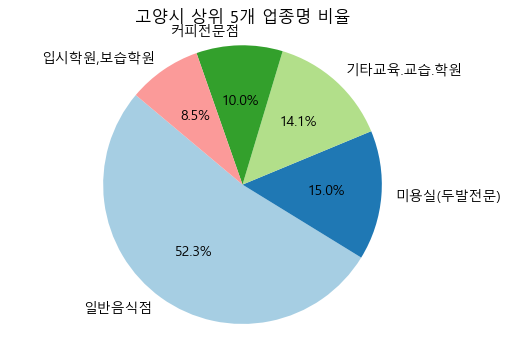

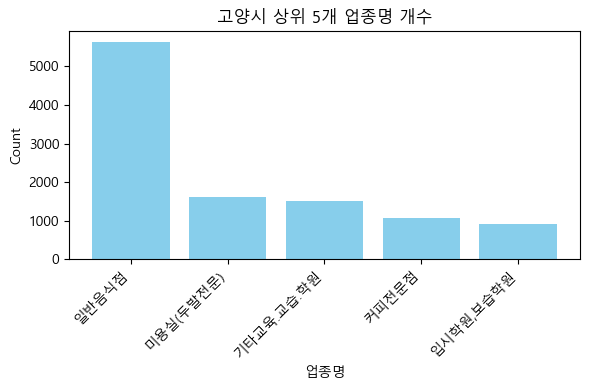

In [70]:
# 예를 들어, 인덱스 0에 해당하는 시군명의 상위 10개 업종명 시각화
plot_top_10_industries_by_city(index)

City/County: 가평군
일반음식점       1084
레저용 숙박업소     193
편의점          150
커피전문점        138
기타식음료품       126
Name: 업종명, dtype: int64


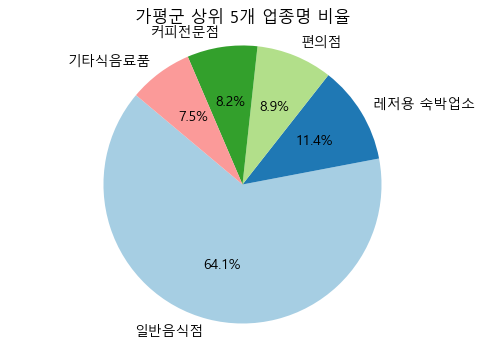

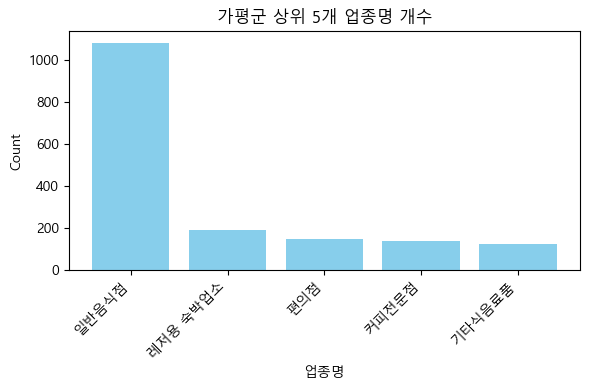

In [71]:
index = 1  # 원하는 시군명의 인덱스 번호
sorted_industry_counts = get_top_10_industries_by_city(index)

# 출력
print(f"City/County: {city_county_names[index]}")
print(sorted_industry_counts)

plot_top_10_industries_by_city(index)

City/County: 부천시
일반음식점         5312
미용실(두발전문)     1680
커피전문점          985
기타교육.교습.학원     972
기타식음료품         801
Name: 업종명, dtype: int64


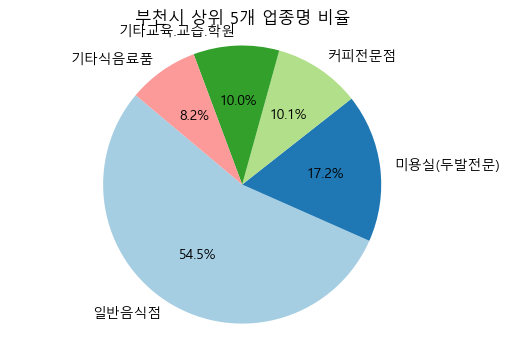

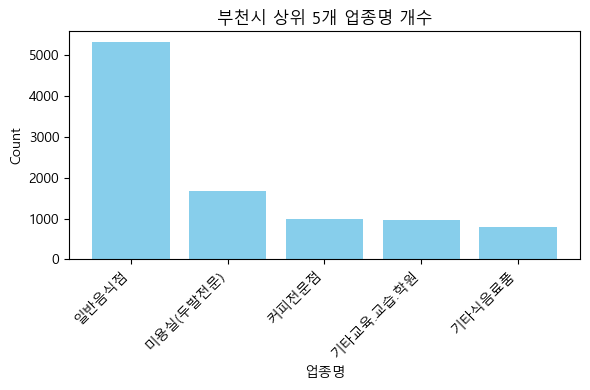

In [72]:
index = 2  # 원하는 시군명의 인덱스 번호
sorted_industry_counts = get_top_10_industries_by_city(index)

# 출력
print(f"City/County: {city_county_names[index]}")
print(sorted_industry_counts)

plot_top_10_industries_by_city(index)

City/County: 부천시
일반음식점         5312
미용실(두발전문)     1680
커피전문점          985
기타교육.교습.학원     972
기타식음료품         801
Name: 업종명, dtype: int64


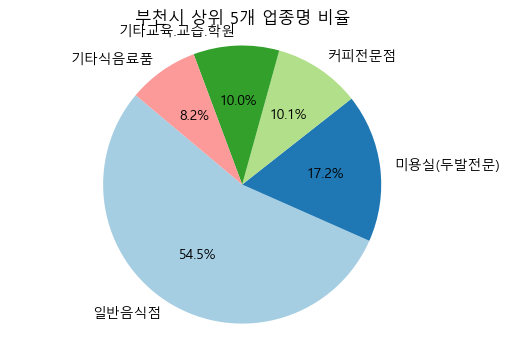

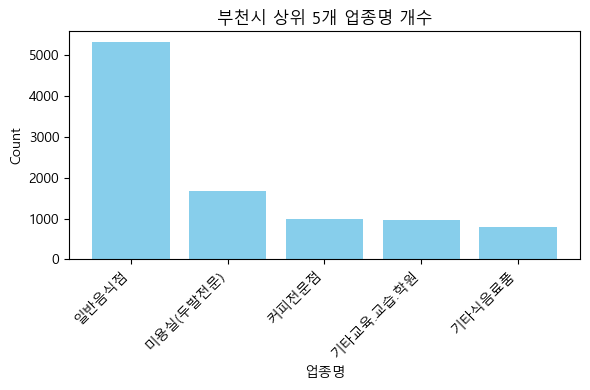

In [73]:
index = 2  # 원하는 시군명의 인덱스 번호
sorted_industry_counts = get_top_10_industries_by_city(index)

# 출력
print(f"City/County: {city_county_names[index]}")
print(sorted_industry_counts)

plot_top_10_industries_by_city(index)

City/County: 동두천시
일반음식점        844
미용실(두발전문)    224
편의점          134
기타식음료품       124
일반의류         102
Name: 업종명, dtype: int64


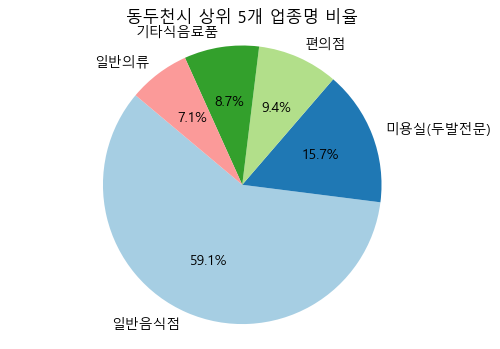

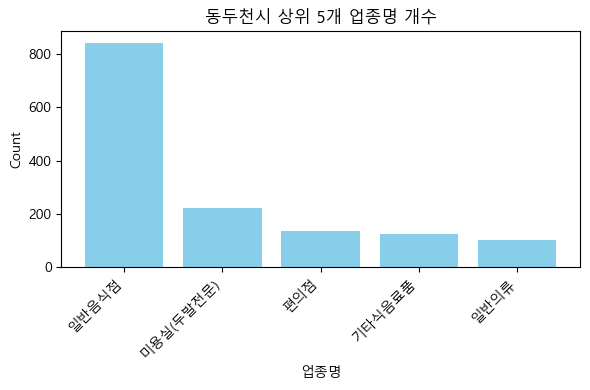

In [74]:
index = 3  # 원하는 시군명의 인덱스 번호
sorted_industry_counts = get_top_10_industries_by_city(index)

# 출력
print(f"City/County: {city_county_names[index]}")
print(sorted_industry_counts)

plot_top_10_industries_by_city(index)

City/County: 과천시
일반음식점          632
교육서비스업         220
미용/뷰티/위생       160
식음료(기타)        134
도서/문화/공연/오락     97
Name: 업종명, dtype: int64


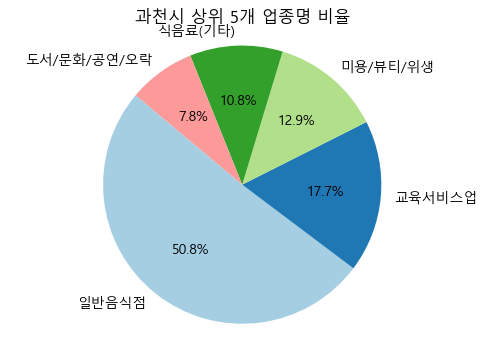

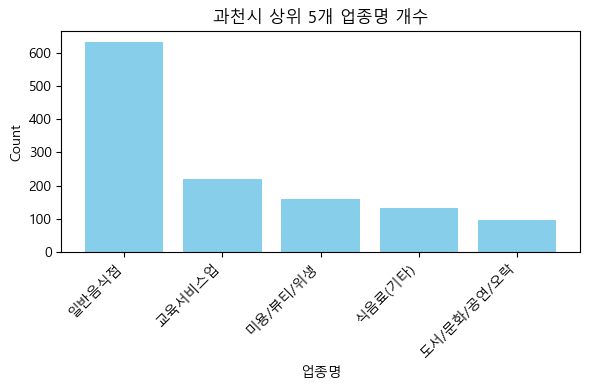

In [75]:
index = 4  # 원하는 시군명의 인덱스 번호
sorted_industry_counts = get_top_10_industries_by_city(index)

# 출력
print(f"City/County: {city_county_names[index]}")
print(sorted_industry_counts)

plot_top_10_industries_by_city(index)

City/County: 광명시
일반음식점         3485
미용/뷰티/위생      1160
교육서비스업        1144
식음료(기타)        863
기타레저,스포츠용품     547
Name: 업종명, dtype: int64


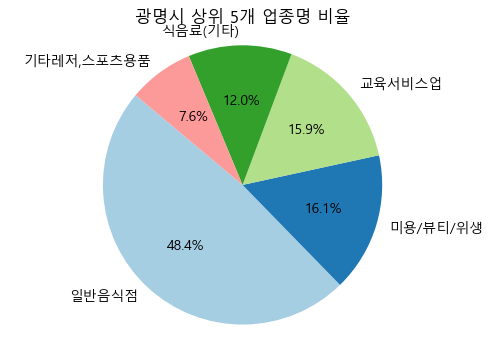

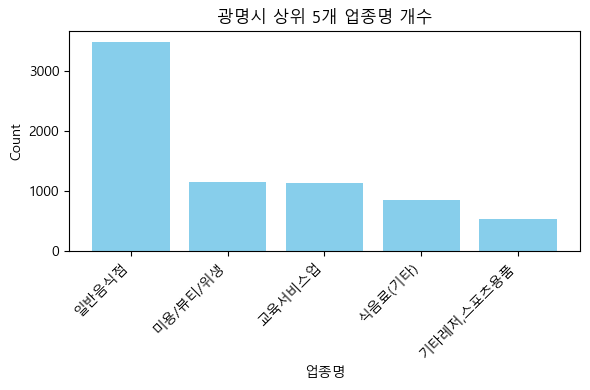

In [76]:
index = 5  # 원하는 시군명의 인덱스 번호
sorted_industry_counts = get_top_10_industries_by_city(index)

# 출력
print(f"City/County: {city_county_names[index]}")
print(sorted_industry_counts)

plot_top_10_industries_by_city(index)

City/County: 광주시
일반음식점         2813
미용실(두발전문)      618
편의점            533
기타교육.교습.학원     463
커피전문점          452
Name: 업종명, dtype: int64


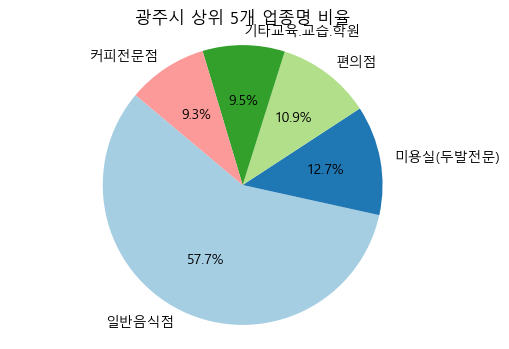

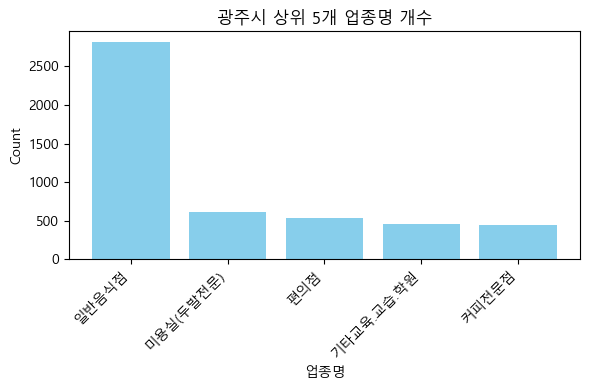

In [77]:
index = 6  # 원하는 시군명의 인덱스 번호
sorted_industry_counts = get_top_10_industries_by_city(index)

# 출력
print(f"City/County: {city_county_names[index]}")
print(sorted_industry_counts)

plot_top_10_industries_by_city(index)

City/County: 구리시
일반음식점         1320
미용실(두발전문)      384
기타교육.교습.학원     289
커피전문점          217
피부.체형미관리       209
Name: 업종명, dtype: int64


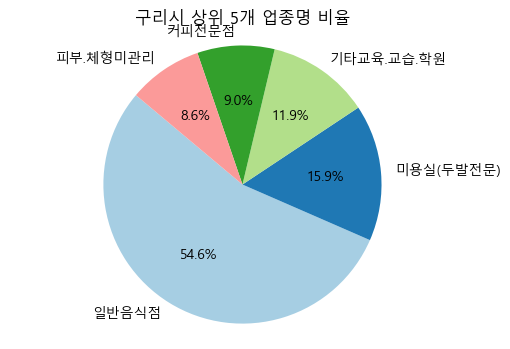

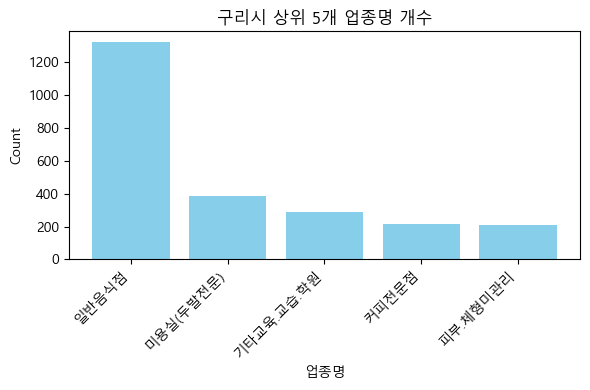

In [78]:
index = 7  # 원하는 시군명의 인덱스 번호
sorted_industry_counts = get_top_10_industries_by_city(index)

# 출력
print(f"City/County: {city_county_names[index]}")
print(sorted_industry_counts)

plot_top_10_industries_by_city(index)

City/County: 군포시
일반음식점         1499
미용실(두발전문)      471
기타교육.교습.학원     401
커피전문점          288
기타식음료품         270
Name: 업종명, dtype: int64


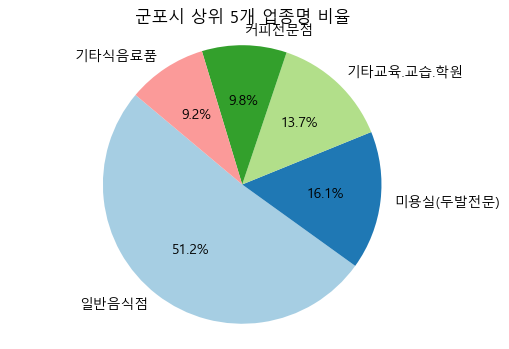

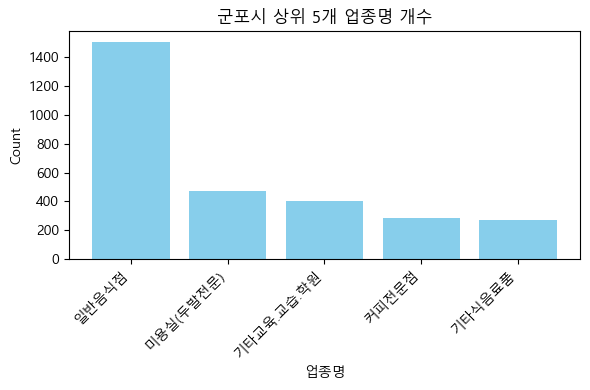

In [79]:
index = 8  # 원하는 시군명의 인덱스 번호
sorted_industry_counts = get_top_10_industries_by_city(index)

# 출력
print(f"City/County: {city_county_names[index]}")
print(sorted_industry_counts)

plot_top_10_industries_by_city(index)

City/County: 김포시
일반음식점         2494
기타음식점          842
미용실(두발전문)      714
커피전문점          712
기타교육.교습.학원     658
Name: 업종명, dtype: int64


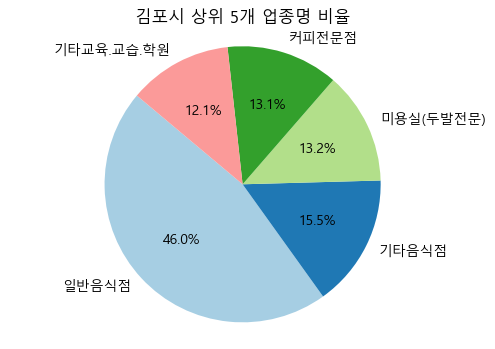

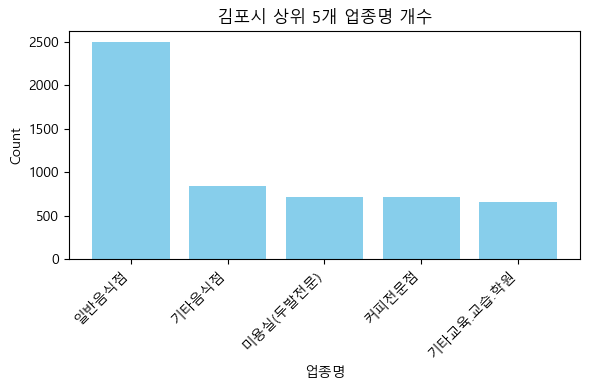

In [80]:
index = 9  # 원하는 시군명의 인덱스 번호
sorted_industry_counts = get_top_10_industries_by_city(index)

# 출력
print(f"City/County: {city_county_names[index]}")
print(sorted_industry_counts)

plot_top_10_industries_by_city(index)

City/County: 남양주시
일반음식점         4662
기타교육.교습.학원    1290
미용실(두발전문)     1274
커피전문점          762
기타식음료품         698
Name: 업종명, dtype: int64


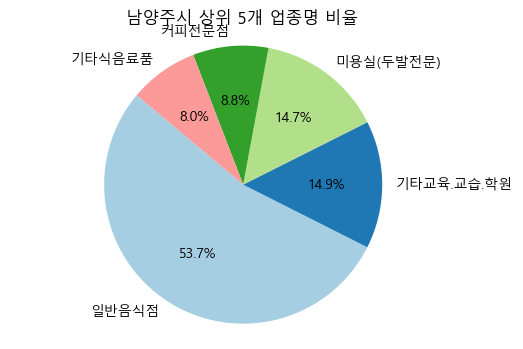

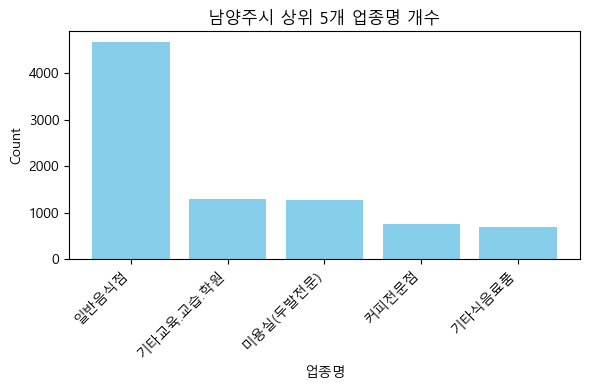

In [81]:
index = 10  # 원하는 시군명의 인덱스 번호
sorted_industry_counts = get_top_10_industries_by_city(index)

# 출력
print(f"City/County: {city_county_names[index]}")
print(sorted_industry_counts)

plot_top_10_industries_by_city(index)

City/County: 성남시
일반음식점         5221
기타교육.교습.학원    2667
기타            2248
미용/뷰티/위생      2026
의료/보건         1496
Name: 업종명, dtype: int64


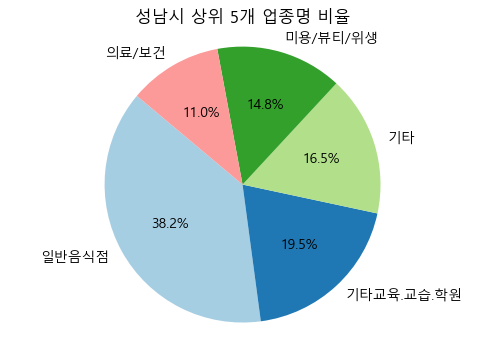

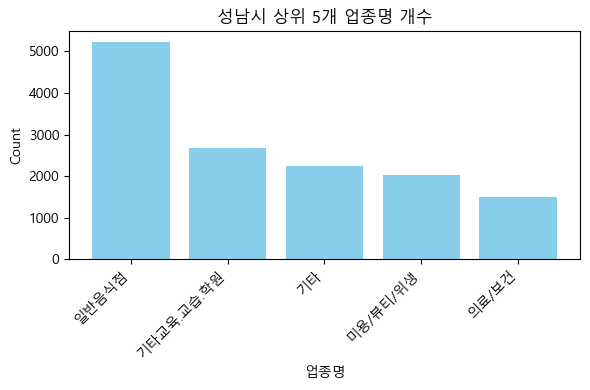

In [82]:
index = 11  # 원하는 시군명의 인덱스 번호
sorted_industry_counts = get_top_10_industries_by_city(index)

# 출력
print(f"City/County: {city_county_names[index]}")
print(sorted_industry_counts)

plot_top_10_industries_by_city(index)

City/County: 시흥시
일반음식점          5898
소매업            3109
개인서비스업         2566
교육서비스업         1961
기타취미.레저.스포츠     544
Name: 업종명, dtype: int64


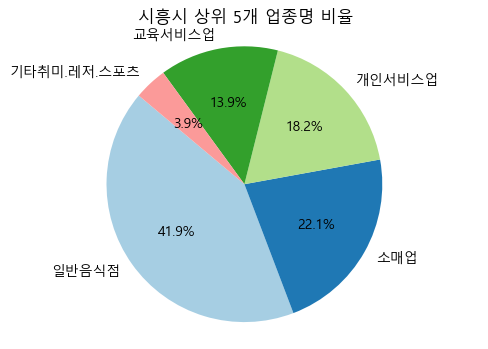

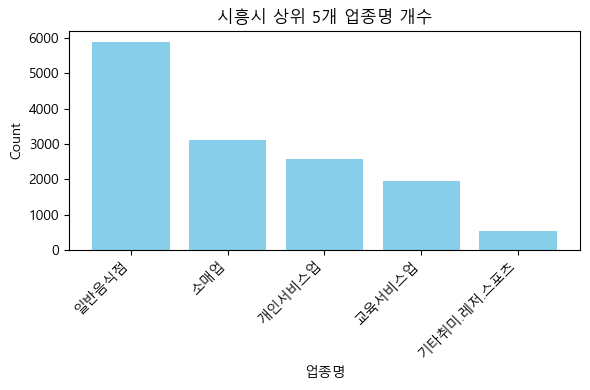

In [83]:
index = 12  # 원하는 시군명의 인덱스 번호
sorted_industry_counts = get_top_10_industries_by_city(index)

# 출력
print(f"City/County: {city_county_names[index]}")
print(sorted_industry_counts)

plot_top_10_industries_by_city(index)

City/County: 안산시
일반음식점         4850
미용실(두발전문)     1267
편의점            939
커피전문점          760
기타교육.교습.학원     620
Name: 업종명, dtype: int64


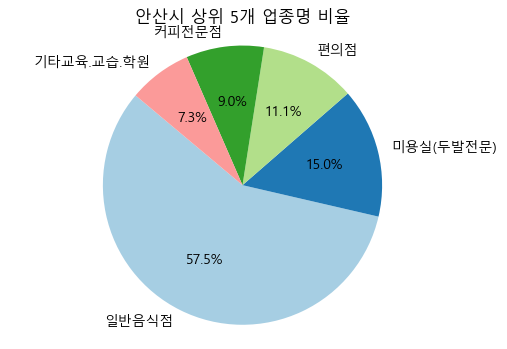

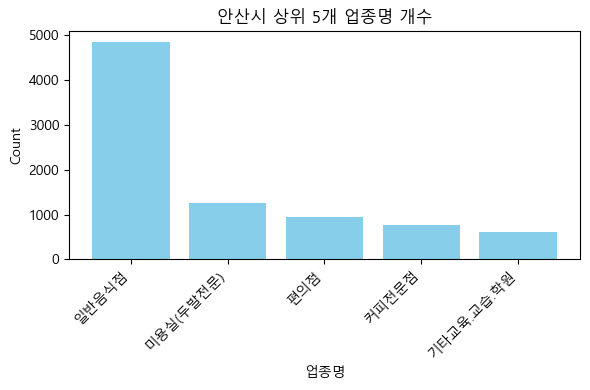

In [84]:
index = 13  # 원하는 시군명의 인덱스 번호
sorted_industry_counts = get_top_10_industries_by_city(index)

# 출력
print(f"City/County: {city_county_names[index]}")
print(sorted_industry_counts)

plot_top_10_industries_by_city(index)

City/County: 이천시
일반음식점         2072
미용실(두발전문)      437
편의점            346
커피전문점          309
기타교육.교습.학원     242
Name: 업종명, dtype: int64


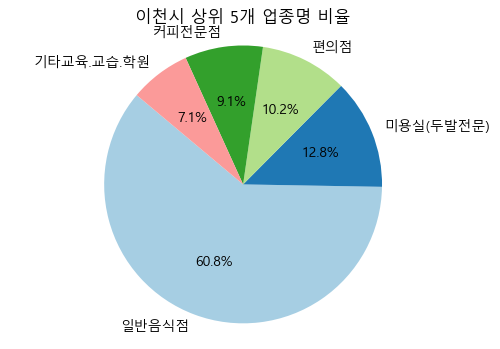

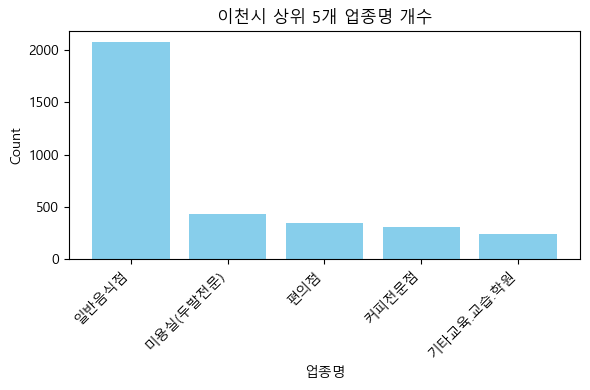

In [85]:
index = 14  # 원하는 시군명의 인덱스 번호
sorted_industry_counts = get_top_10_industries_by_city(index)

# 출력
print(f"City/County: {city_county_names[index]}")
print(sorted_industry_counts)

plot_top_10_industries_by_city(index)

City/County: 용인시
일반음식점         6089
기타교육.교습.학원    1770
미용실(두발전문)     1489
커피전문점         1172
편의점           1100
Name: 업종명, dtype: int64


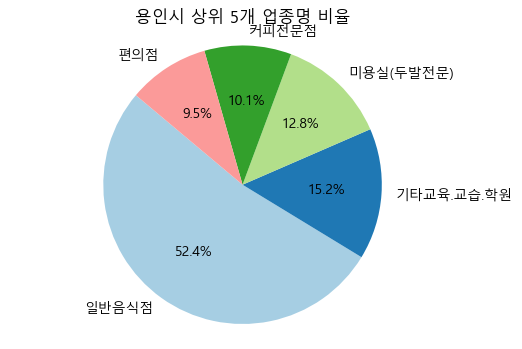

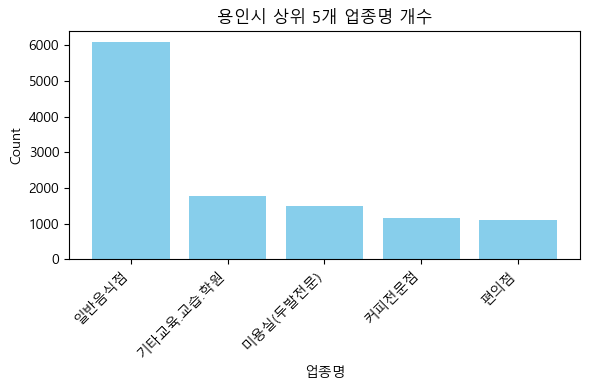

In [86]:
index = 15  # 원하는 시군명의 인덱스 번호
sorted_industry_counts = get_top_10_industries_by_city(index)

# 출력
print(f"City/County: {city_county_names[index]}")
print(sorted_industry_counts)

plot_top_10_industries_by_city(index)

City/County: 파주시
일반음식점         4141
기타교육.교습.학원     807
미용실(두발전문)      749
커피전문점          642
편의점            604
Name: 업종명, dtype: int64


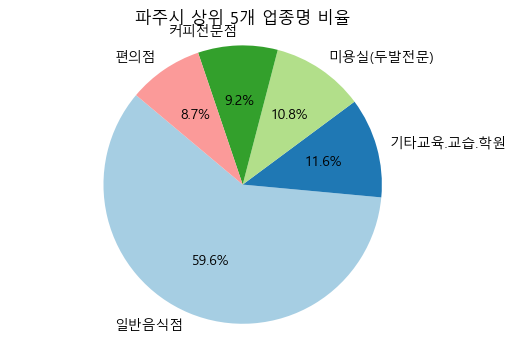

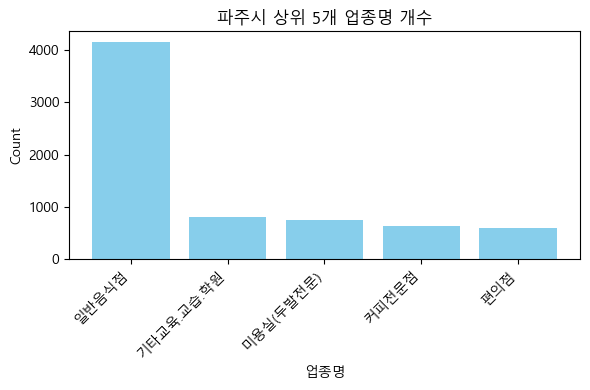

In [87]:
index = 16  # 원하는 시군명의 인덱스 번호
sorted_industry_counts = get_top_10_industries_by_city(index)

# 출력
print(f"City/County: {city_county_names[index]}")
print(sorted_industry_counts)

plot_top_10_industries_by_city(index)

City/County: 평택시
일반음식점       11674
미용/뷰티/위생     2567
식음료(기타)      1869
소매업          1858
교육서비스업       1837
Name: 업종명, dtype: int64


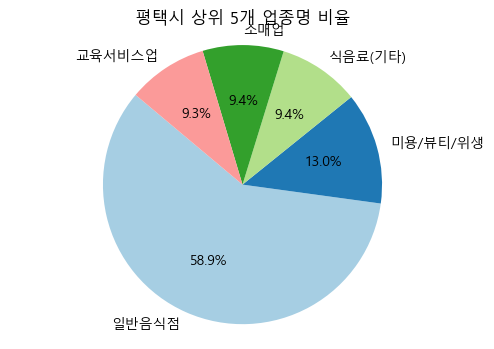

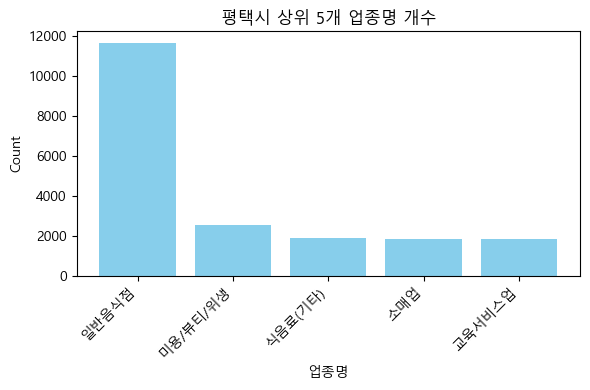

In [88]:
index = 17  # 원하는 시군명의 인덱스 번호
sorted_industry_counts = get_top_10_industries_by_city(index)

# 출력
print(f"City/County: {city_county_names[index]}")
print(sorted_industry_counts)

plot_top_10_industries_by_city(index)

City/County: 화성시
일반음식점         6184
기타교육.교습.학원    1949
미용실(두발전문)     1413
커피전문점         1282
편의점           1200
Name: 업종명, dtype: int64


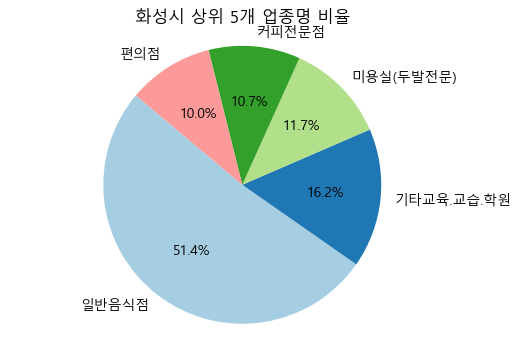

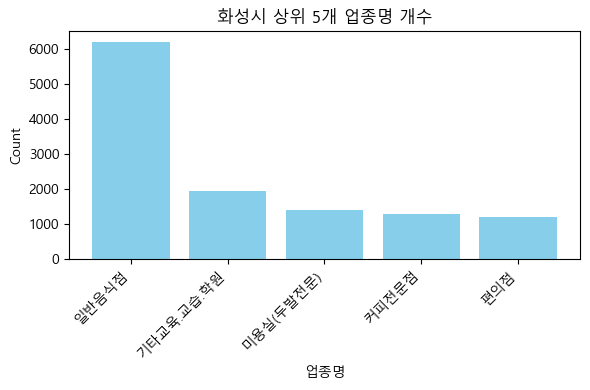

In [89]:
index = 18  # 원하는 시군명의 인덱스 번호
sorted_industry_counts = get_top_10_industries_by_city(index)

# 출력
print(f"City/County: {city_county_names[index]}")
print(sorted_industry_counts)

plot_top_10_industries_by_city(index)

City/County: 수원시
일반음식점         8626
미용실(두발전문)     2426
기타교육.교습.학원    1826
커피전문점         1745
편의점           1218
Name: 업종명, dtype: int64


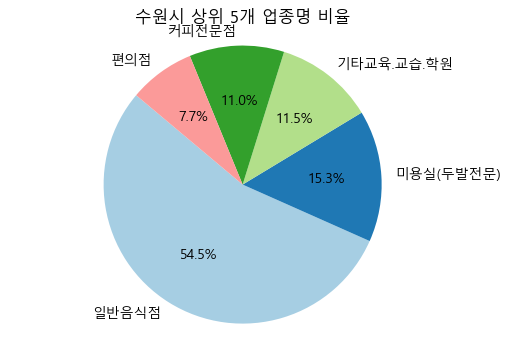

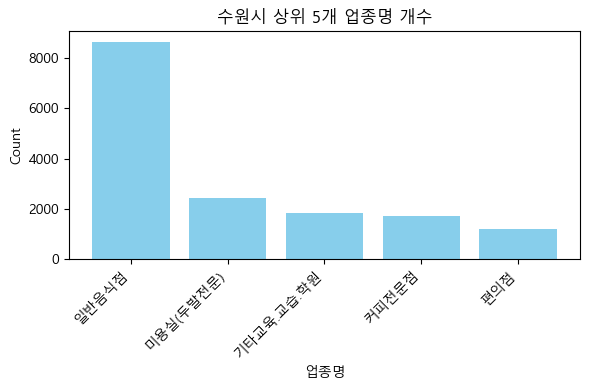

In [91]:
index = 19  # 원하는 시군명의 인덱스 번호
sorted_industry_counts = get_top_10_industries_by_city(index)

# 출력
print(f"City/County: {city_county_names[index]}")
print(sorted_industry_counts)

plot_top_10_industries_by_city(index)

City/County: 안성시
일반음식점         2063
미용실(두발전문)      399
편의점            345
커피전문점          279
기타교육.교습.학원     227
Name: 업종명, dtype: int64


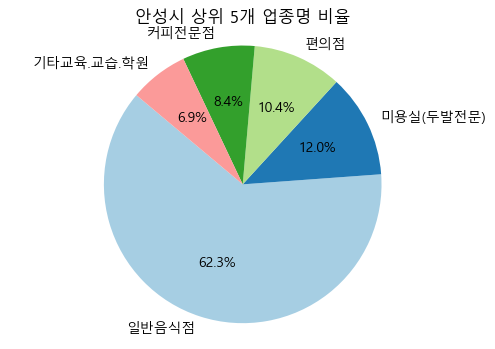

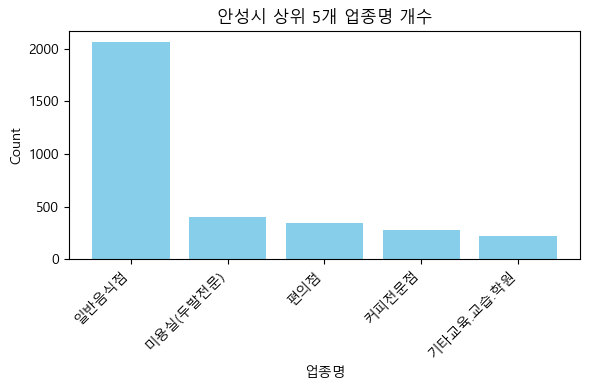

In [92]:
index = 20  # 원하는 시군명의 인덱스 번호
sorted_industry_counts = get_top_10_industries_by_city(index)

# 출력
print(f"City/County: {city_county_names[index]}")
print(sorted_industry_counts)

plot_top_10_industries_by_city(index)

City/County: 안양시
일반음식점         3623
미용실(두발전문)     1027
기타교육.교습.학원     920
커피전문점          826
기타식음료품         567
Name: 업종명, dtype: int64


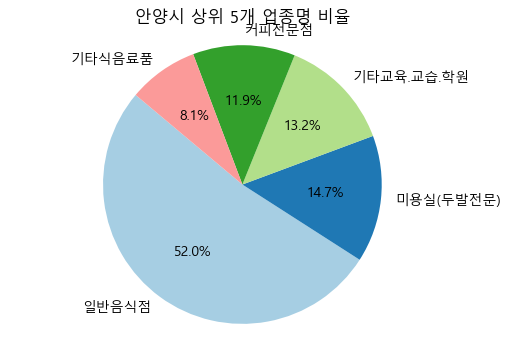

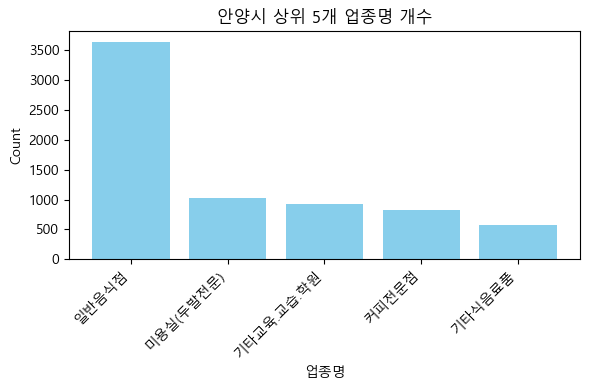

In [93]:
index = 21  # 원하는 시군명의 인덱스 번호
sorted_industry_counts = get_top_10_industries_by_city(index)

# 출력
print(f"City/County: {city_county_names[index]}")
print(sorted_industry_counts)

plot_top_10_industries_by_city(index)

City/County: 양주시
일반음식점         2617
미용실(두발전문)      494
기타교육.교습.학원     405
편의점            395
커피전문점          356
Name: 업종명, dtype: int64


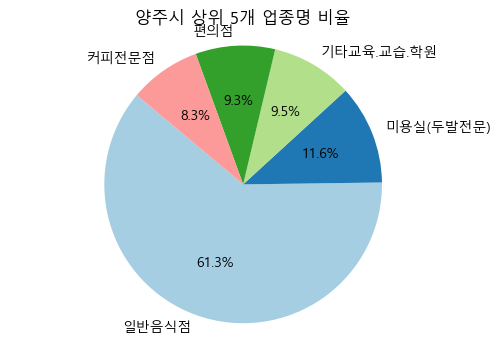

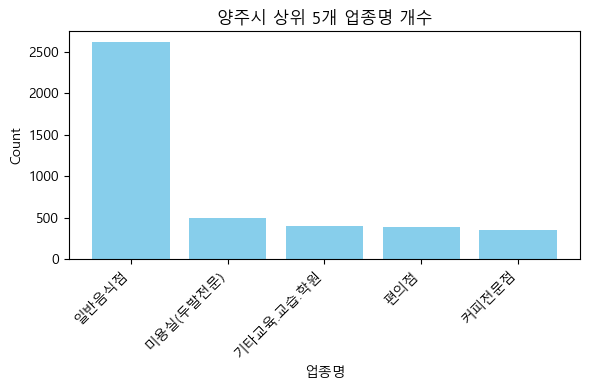

In [94]:
index = 22  # 원하는 시군명의 인덱스 번호
sorted_industry_counts = get_top_10_industries_by_city(index)

# 출력
print(f"City/County: {city_county_names[index]}")
print(sorted_industry_counts)

plot_top_10_industries_by_city(index)

City/County: 양평군
일반음식점        1309
편의점           192
커피전문점         189
미용실(두발전문)     180
기타식음료품        149
Name: 업종명, dtype: int64


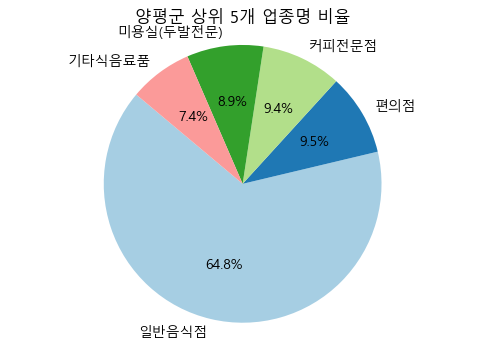

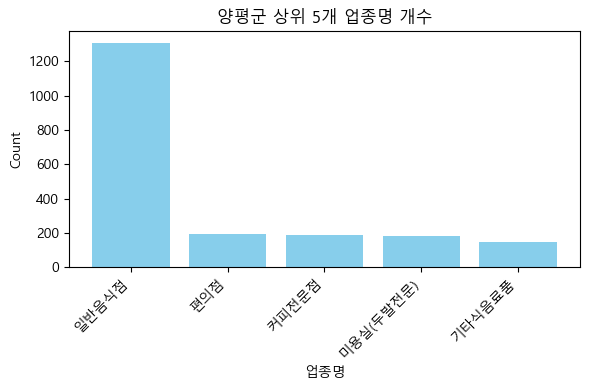

In [95]:
index = 23  # 원하는 시군명의 인덱스 번호
sorted_industry_counts = get_top_10_industries_by_city(index)

# 출력
print(f"City/County: {city_county_names[index]}")
print(sorted_industry_counts)

plot_top_10_industries_by_city(index)

City/County: 여주시
일반음식점        1224
미용실(두발전문)     215
편의점           197
커피전문점         164
기타식음료품        143
Name: 업종명, dtype: int64


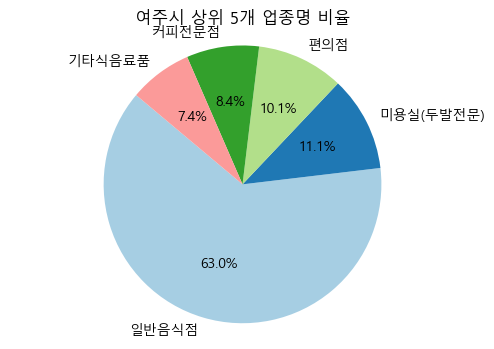

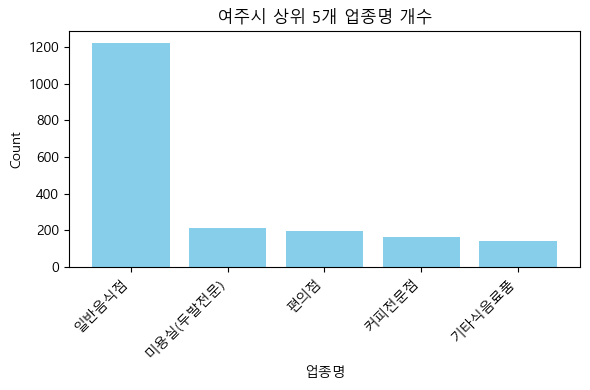

In [96]:
index = 24  # 원하는 시군명의 인덱스 번호
sorted_industry_counts = get_top_10_industries_by_city(index)

# 출력
print(f"City/County: {city_county_names[index]}")
print(sorted_industry_counts)

plot_top_10_industries_by_city(index)

City/County: 연천군
일반음식점        716
편의점          100
기타식음료품        84
커피전문점         75
미용실(두발전문)     71
Name: 업종명, dtype: int64


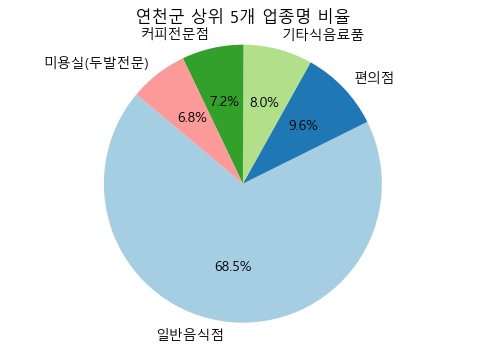

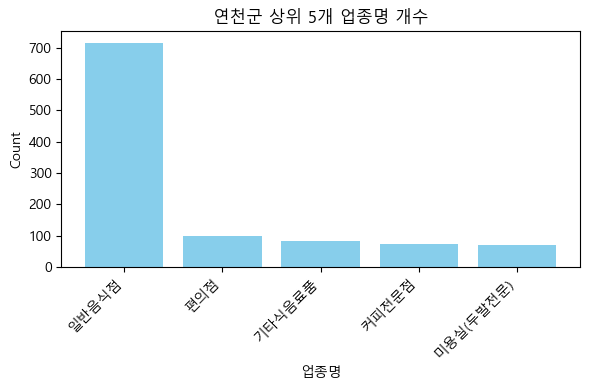

In [97]:
index = 25  # 원하는 시군명의 인덱스 번호
sorted_industry_counts = get_top_10_industries_by_city(index)

# 출력
print(f"City/County: {city_county_names[index]}")
print(sorted_industry_counts)

plot_top_10_industries_by_city(index)

City/County: 오산시
일반음식점         1680
미용실(두발전문)      433
기타교육.교습.학원     327
편의점            260
커피전문점          257
Name: 업종명, dtype: int64


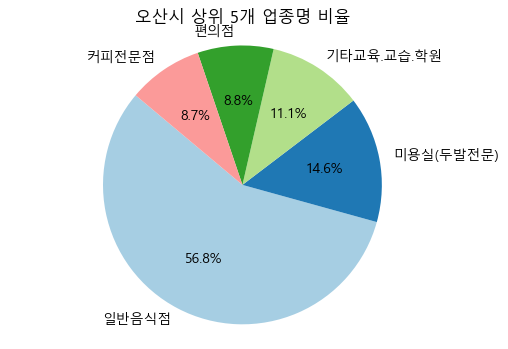

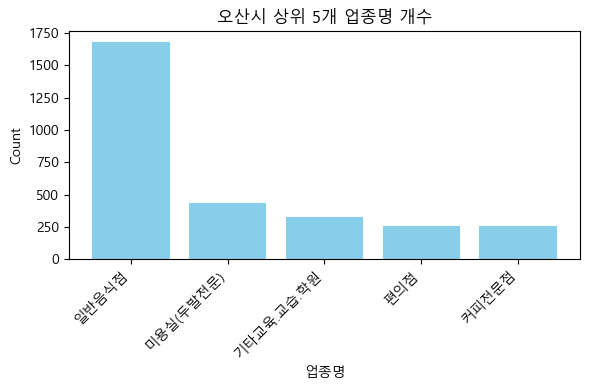

In [98]:
index = 26  # 원하는 시군명의 인덱스 번호
sorted_industry_counts = get_top_10_industries_by_city(index)

# 출력
print(f"City/County: {city_county_names[index]}")
print(sorted_industry_counts)

plot_top_10_industries_by_city(index)

City/County: 의왕시
일반음식점         1241
미용/뷰티/위생       360
교육서비스업         353
식음료(기타)        251
기타레저,스포츠용품     183
Name: 업종명, dtype: int64


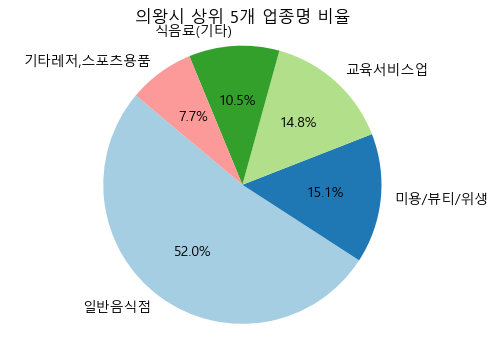

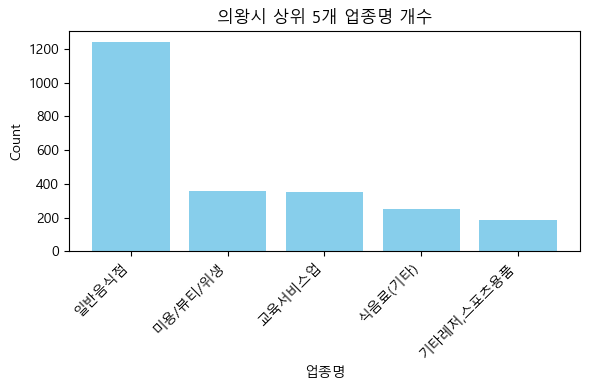

In [99]:
index = 27  # 원하는 시군명의 인덱스 번호
sorted_industry_counts = get_top_10_industries_by_city(index)

# 출력
print(f"City/County: {city_county_names[index]}")
print(sorted_industry_counts)

plot_top_10_industries_by_city(index)

City/County: 의정부시
일반음식점         3061
미용실(두발전문)      907
기타교육.교습.학원     532
커피전문점          468
편의점            437
Name: 업종명, dtype: int64


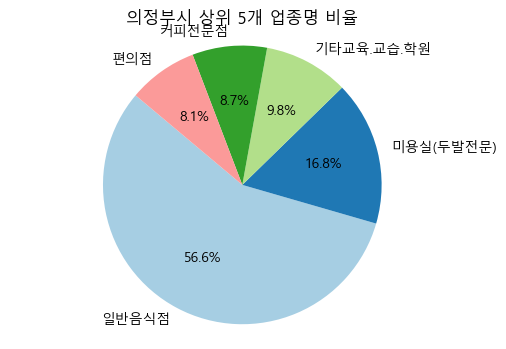

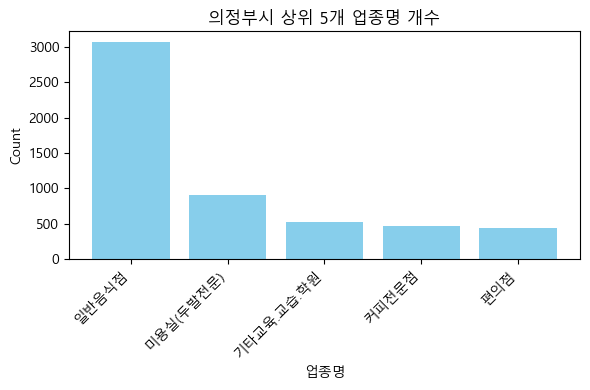

In [100]:
index = 28  # 원하는 시군명의 인덱스 번호
sorted_industry_counts = get_top_10_industries_by_city(index)

# 출력
print(f"City/County: {city_county_names[index]}")
print(sorted_industry_counts)

plot_top_10_industries_by_city(index)

City/County: 포천시
일반음식점        1961
편의점           354
미용실(두발전문)     267
커피전문점         196
자동차정비         190
Name: 업종명, dtype: int64


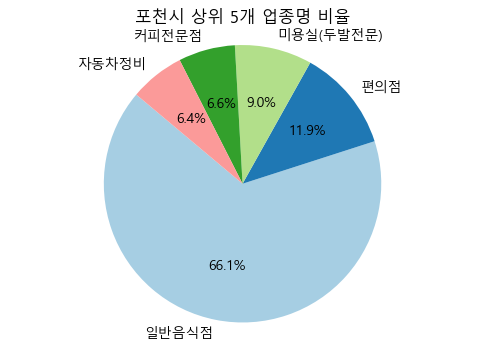

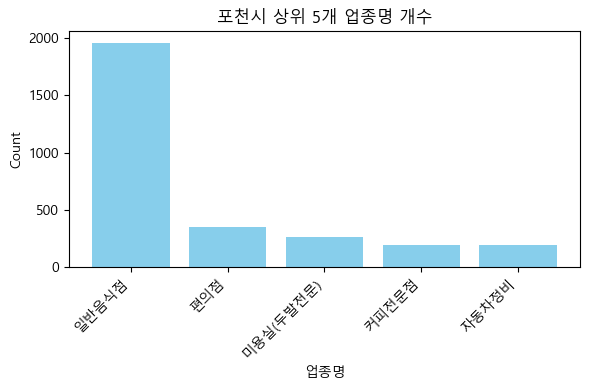

In [101]:
index = 29  # 원하는 시군명의 인덱스 번호
sorted_industry_counts = get_top_10_industries_by_city(index)

# 출력
print(f"City/County: {city_county_names[index]}")
print(sorted_industry_counts)

plot_top_10_industries_by_city(index)

City/County: 하남시
일반음식점         2005
기타교육.교습.학원     547
미용실(두발전문)      466
커피전문점          377
입시학원,보습학원      316
Name: 업종명, dtype: int64


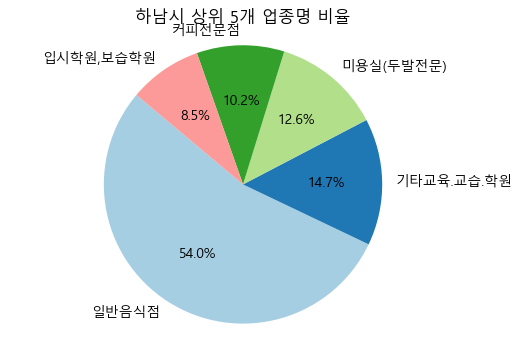

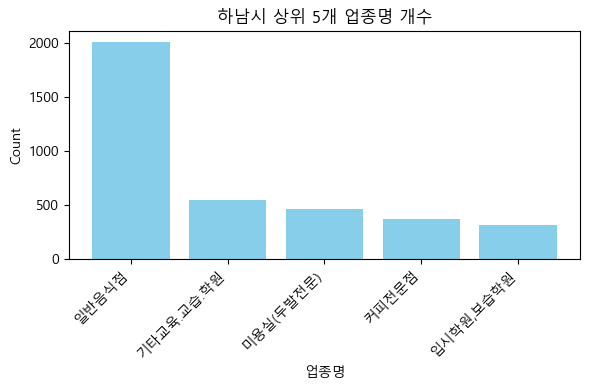

In [102]:
index = 30  # 원하는 시군명의 인덱스 번호
sorted_industry_counts = get_top_10_industries_by_city(index)

# 출력
print(f"City/County: {city_county_names[index]}")
print(sorted_industry_counts)

plot_top_10_industries_by_city(index)

# 하위 5개도 해보자.

In [105]:
# 하위 5개 추출 하는 함수
def get_bottom_5_industries_by_city(index):
    city_name = city_county_names[index]
    filtered_df = df1[df1['시군명'] == city_name]
    industry_count = filtered_df['업종명'].value_counts()
    bottom_5_industry_count = industry_count.nsmallest(5)
    return bottom_5_industry_count

In [106]:
# 시각화
def plot_bottom_5_industries_by_city(index):
    # 특정 시군명의 하위 5개 업종명을 계산
    bottom_5_industries = get_bottom_5_industries_by_city(index)
    
    city_name = city_county_names[index]
    
    # 원 그래프
    plt.figure(figsize=(8, 6))  # 크기를 조절
    plt.pie(bottom_5_industries, labels=bottom_5_industries.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
    plt.title(f"{city_name} 하위 5개 업종명 비율")
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()
    
    # 막대 그래프
    plt.figure(figsize=(10, 6))  # 크기를 조절
    plt.bar(bottom_5_industries.index, bottom_5_industries, color='skyblue')
    plt.xlabel('업종명')
    plt.ylabel('Count')
    plt.title(f"{city_name} 하위 5개 업종명 개수")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

City/County: 고양시
기타승객운송업     1
주유소         1
자동차(중고차)    1
웨딩토탈서비스     1
기타무점포       1
Name: 업종명, dtype: int64


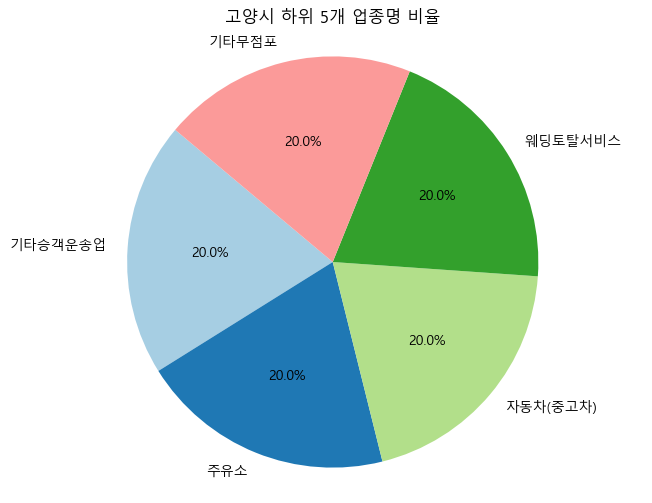

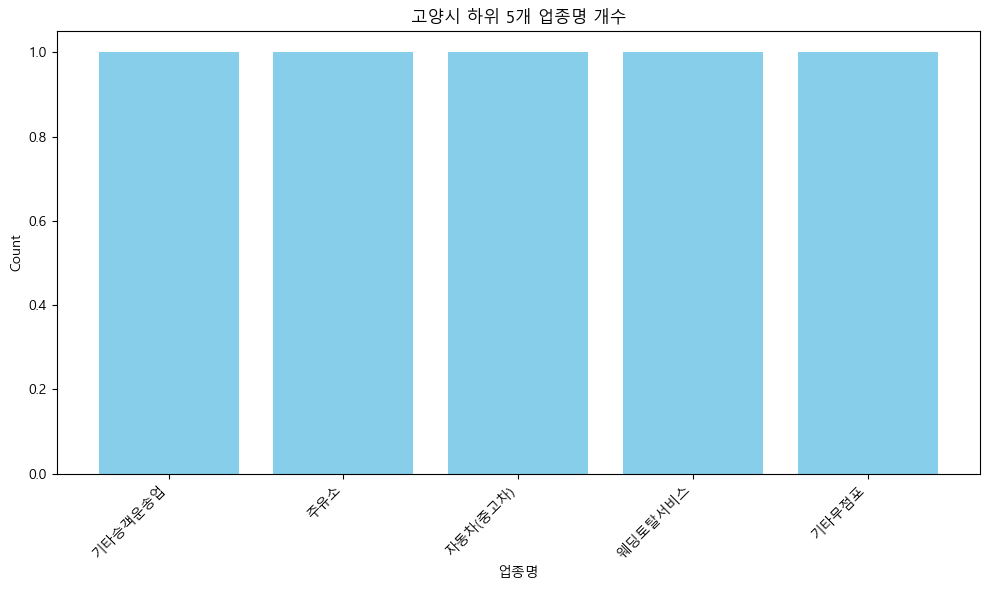

In [108]:
index = 0  # 원하는 시군명의 인덱스 번호
sorted_industry_counts = get_bottom_5_industries_by_city(index)

# 출력
print(f"City/County: {city_county_names[index]}")
print(sorted_industry_counts)

plot_bottom_5_industries_by_city(index)

City/County: 가평군
총포류           1
신경정신과         1
오양.보육.복지시설    1
기타대인서비스       1
기타가례서비스       1
Name: 업종명, dtype: int64


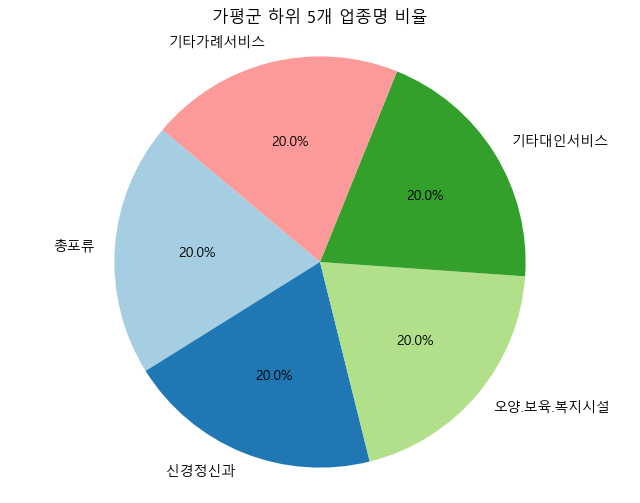

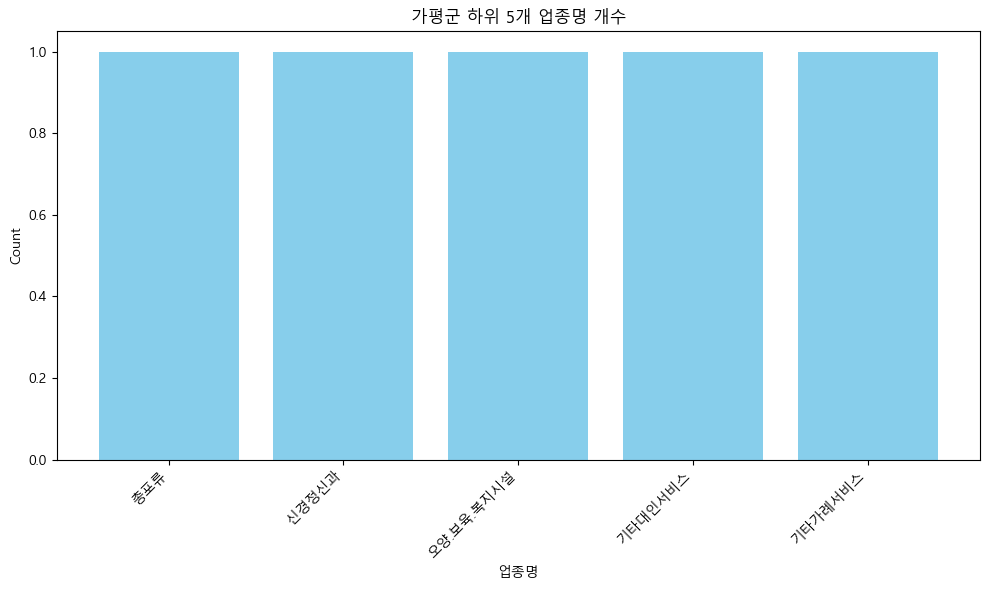

In [109]:
index = 1  # 원하는 시군명의 인덱스 번호
sorted_industry_counts = get_bottom_5_industries_by_city(index)

# 출력
print(f"City/County: {city_county_names[index]}")
print(sorted_industry_counts)

plot_bottom_5_industries_by_city(index)